In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [119]:
df= pd.read_csv("C:\\Users\\ANJALI\\Downloads\\heart.csv")

In [121]:
df.shape

(918, 12)

In [123]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [125]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [127]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

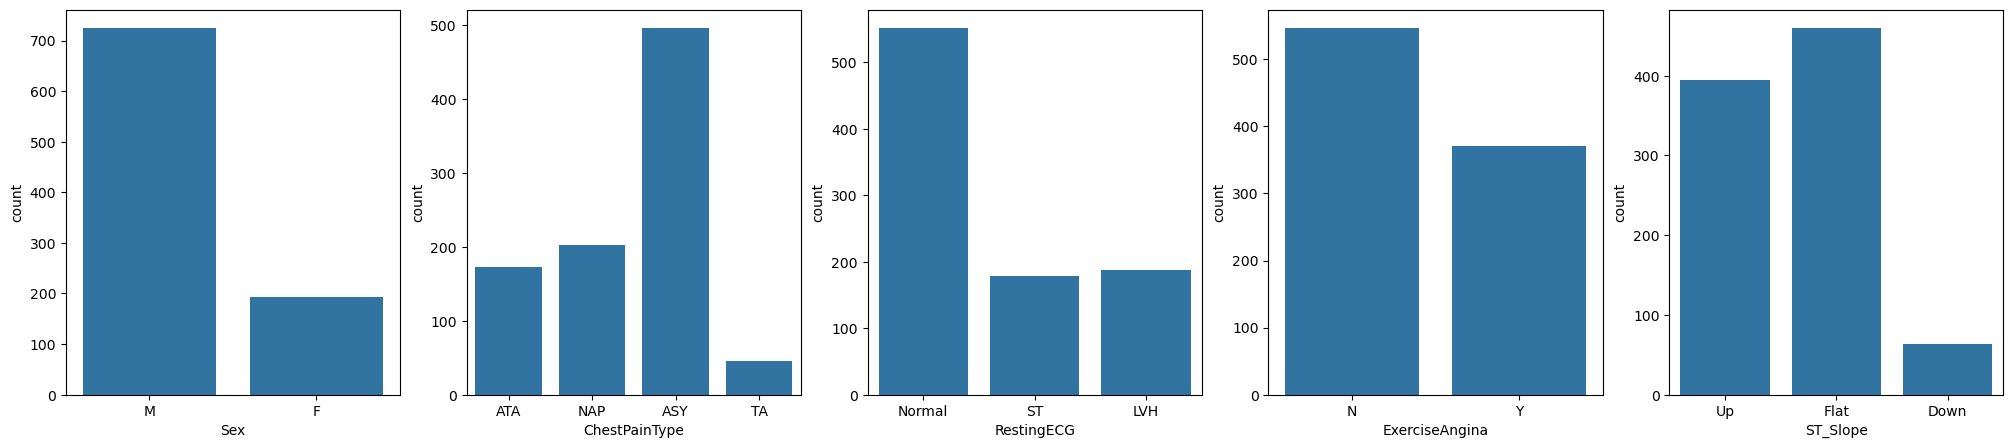

In [133]:
cat=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
plt.figure(figsize=(25,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  sns.countplot(x=cat[i], data=df)

In [139]:
df[df.HeartDisease == 1]['Sex'].value_counts()

Sex
M    458
F     50
Name: count, dtype: int64

Text(0.5, 1.0, 'ChestPainType')

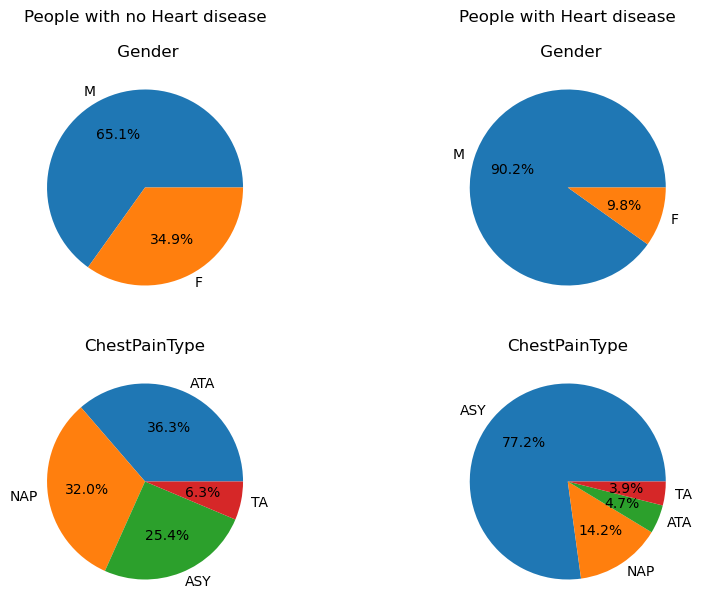

In [143]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
axs[0, 0].pie( df[df.HeartDisease == 0]['Sex'].value_counts(), labels= df[df.HeartDisease == 0]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( df[df.HeartDisease == 1]['Sex'].value_counts(), labels= df[df.HeartDisease == 1]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n Gender")
axs[0,1].set_title("People with Heart disease\n\n Gender")
axs[1, 0].pie( df[df.HeartDisease == 0]['ChestPainType'].value_counts(), labels= df[df.HeartDisease == 0]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1, 1].pie( df[df.HeartDisease == 1]['ChestPainType'].value_counts(), labels= df[df.HeartDisease == 1]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ChestPainType")
axs[1,1].set_title("ChestPainType")

Text(0.5, 1.0, 'FastingBS')

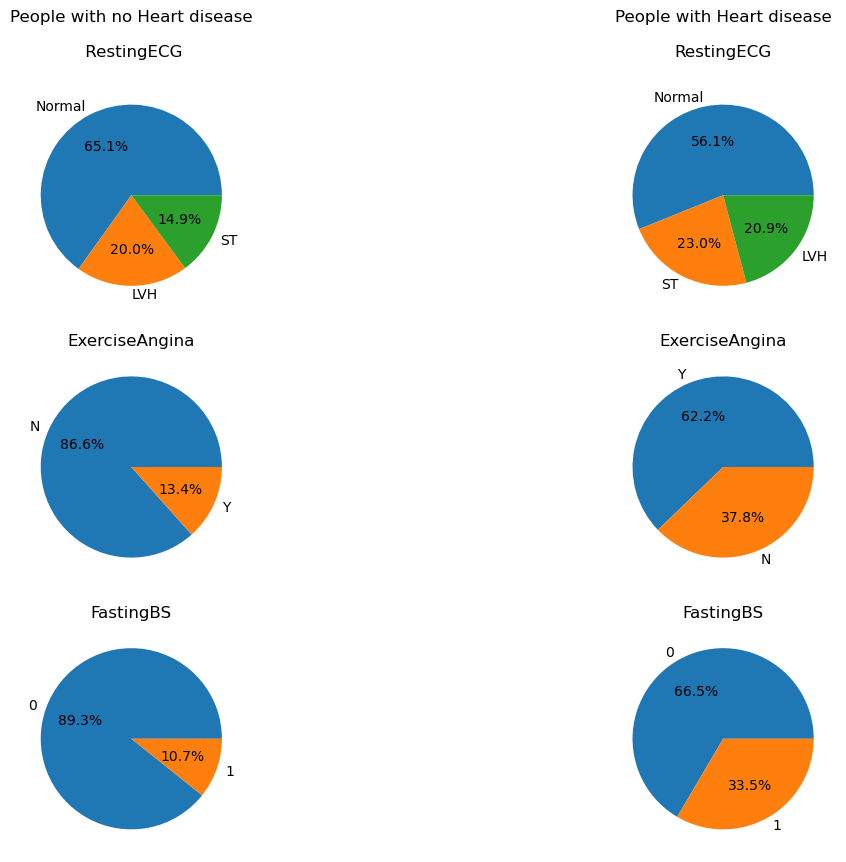

In [147]:
fig,axs = plt.subplots(3,2,figsize = (14,10))
axs[0, 0].pie( df[df.HeartDisease == 0]['RestingECG'].value_counts(), labels= df[df.HeartDisease == 0]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( df[df.HeartDisease == 1]['RestingECG'].value_counts(), labels= df[df.HeartDisease == 1]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n RestingECG\n")
axs[0,1].set_title("People with Heart disease\n\nRestingECG\n")
axs[1, 0].pie( df[df.HeartDisease == 0]['ExerciseAngina'].value_counts(), labels= df[df.HeartDisease == 0]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ExerciseAngina")
axs[1, 1].pie( df[df.HeartDisease == 1]['ExerciseAngina'].value_counts(), labels= df[df.HeartDisease == 1]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,1].set_title("ExerciseAngina")
axs[2, 0].pie( df[df.HeartDisease == 0]['FastingBS'].value_counts(), labels= df[df.HeartDisease == 0]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,0].set_title("FastingBS")
axs[2, 1].pie( df[df.HeartDisease == 1]['FastingBS'].value_counts(), labels= df[df.HeartDisease == 1]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,1].set_title("FastingBS")

<Axes: xlabel='RestingBP', ylabel='Count'>

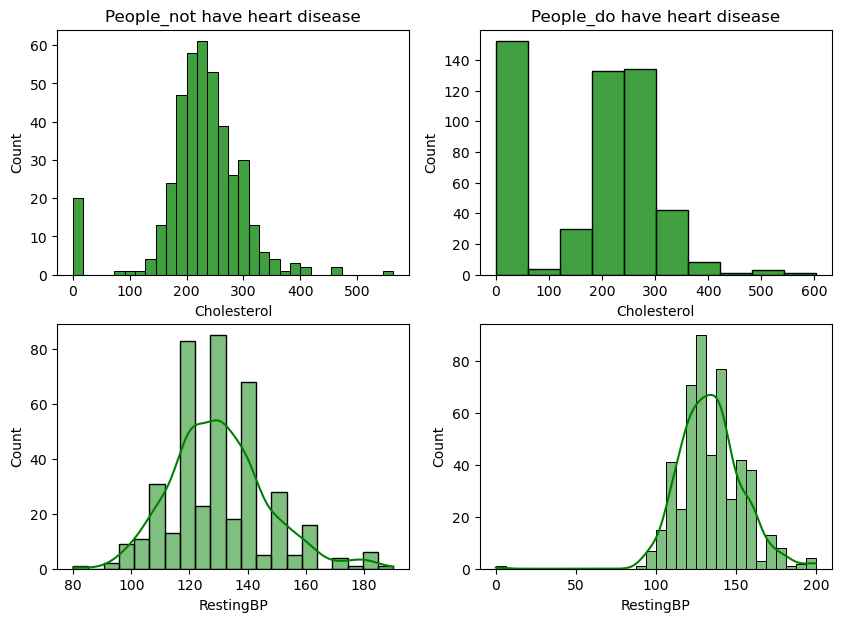

In [149]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
sns.histplot(df[df.HeartDisease ==0].Cholesterol,ax = axs[0,0],color = 'green')
axs[0,0].set_title("People_not have heart disease")
sns.histplot(df[df.HeartDisease ==1].Cholesterol,ax = axs[0,1],color = 'green')
axs[0,1].set_title("People_do have heart disease")
sns.histplot(df[df.HeartDisease ==0].RestingBP,ax = axs[1,0],kde = True,color = 'green')
sns.histplot(df[df.HeartDisease ==1].RestingBP,ax = axs[1,1],kde = True,color = 'green')

In [151]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [153]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [155]:
x=df.drop('HeartDisease', axis=1).values.reshape(-1,1)
y=df['HeartDisease'].values.reshape(-1,1)

In [157]:
item=['RestingBP','Cholesterol']
for i in range(len(item)):
    print(f'nl \n ',df[item[i]].nlargest(3))
    print(f'ns \n ',df[item[i]].nsmallest(3))

nl 
  241    200
365    200
399    200
Name: RestingBP, dtype: int64
ns 
  449     0
314    80
227    92
Name: RestingBP, dtype: int64
nl 
  149    603
616    564
76     529
Name: Cholesterol, dtype: int64
ns 
  293    0
294    0
295    0
Name: Cholesterol, dtype: int64


In [159]:
print(f'nl \n ',df['MaxHR'].nlargest(3))
print(f'ns \n ',df['MaxHR'].nsmallest(3))

nl 
  829    202
759    195
795    194
Name: MaxHR, dtype: int64
ns 
  390    60
370    63
402    67
Name: MaxHR, dtype: int64


In [161]:
print(df.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


In [163]:
df['RestingBP'] = pd.to_numeric(df['RestingBP'], errors='coerce')
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce')

In [165]:
df['RestingBP']=df['RestingBP'].apply(lambda x: np.nan if x > 140 else x)
df['RestingBP']=df['RestingBP'].apply(lambda x: np.nan if x < 40 else x)
df['Cholesterol']=df['Cholesterol'].replace(0,np.nan)

In [167]:
df.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP         221
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [169]:
df['RestingBP']=df['RestingBP'].replace(np.nan,df['RestingBP'].median())
df['Cholesterol']=df['Cholesterol'].replace(np.nan,df['Cholesterol'].median())

In [171]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [175]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [9]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [13]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
label_cols = df.select_dtypes(include=['object']).columns
label_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [25]:
lab_enc = LabelEncoder()
for col in label_cols:
    df[col] = lab_enc.fit_transform(df[col])
    
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [27]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [29]:
correlation = df.corr()
correlation

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


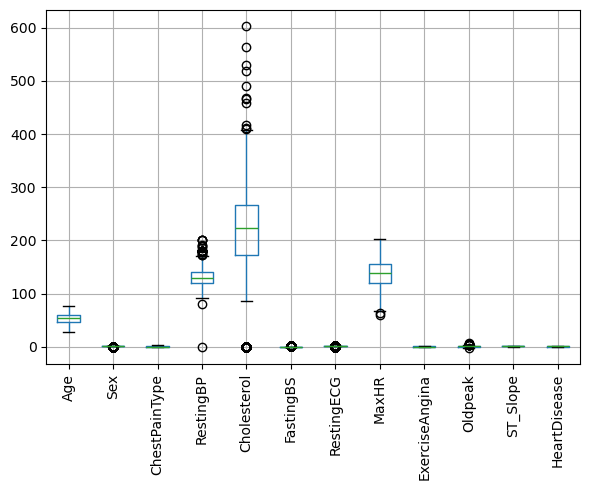

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(734, 11)

In [35]:
y_train.value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

In [37]:
y_test.value_counts()

HeartDisease
1    107
0     77
Name: count, dtype: int64

In [39]:
401/333

1.2042042042042043

In [41]:
107/77

1.3896103896103895

In [43]:
y_train.head()

795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64

In [45]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [47]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [49]:
X_train_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [51]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),index = X_train.index,columns=X_train.columns)


X_test = pd.DataFrame(scaler.fit_transform(X_test),index = X_test.index,columns = X_test.columns)

X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,-1.245067,0.540605,1.316743,-0.708985,0.372803,1.842609,0.017342,2.284353,-0.838461,-0.097061,-2.257465
25,-1.886236,0.540605,1.316743,-0.166285,0.086146,-0.542709,0.017342,1.652241,-0.838461,-0.836286,1.079855
84,0.250993,0.540605,-0.809746,0.919115,0.123134,1.842609,0.017342,-0.441628,1.192662,0.087745,-0.588805
10,-1.779375,-1.849780,1.316743,-0.166285,0.104640,-0.542709,0.017342,0.229991,-0.838461,-0.836286,1.079855
344,-0.283314,0.540605,-0.809746,-0.708985,-1.846478,1.842609,0.017342,-1.271274,-0.838461,-0.836286,-0.588805


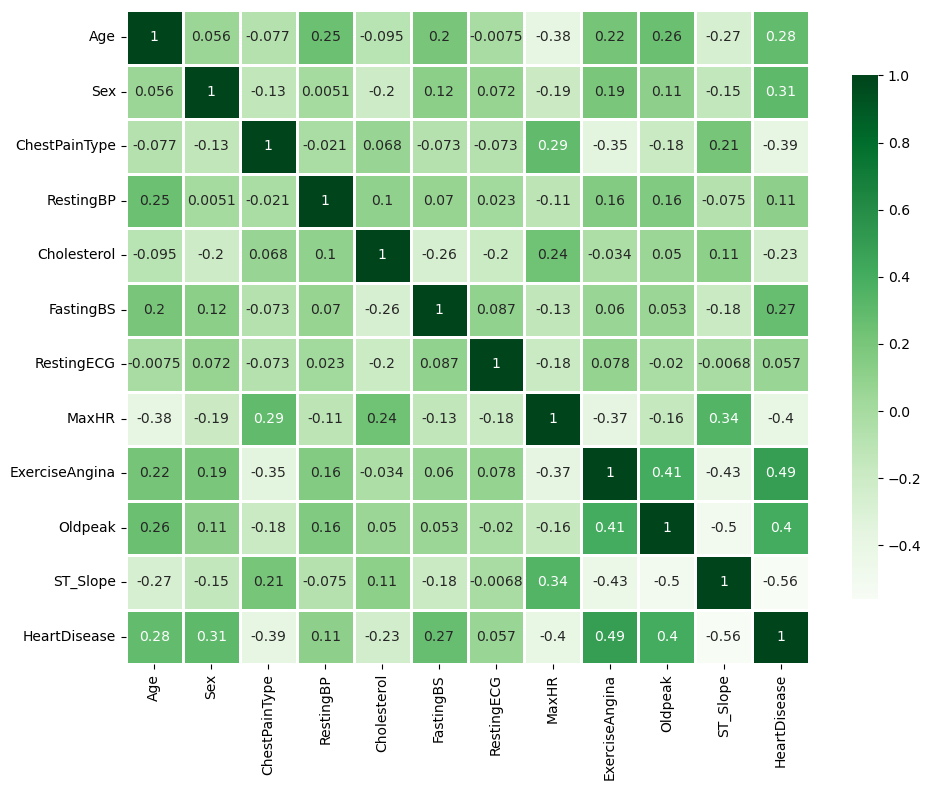

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap="Greens", fmt='.2g',linewidths=1, cbar_kws={'shrink': .8})
plt.tight_layout()

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 795 to 102
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    float64
 1   Sex             734 non-null    float64
 2   ChestPainType   734 non-null    float64
 3   RestingBP       734 non-null    float64
 4   Cholesterol     734 non-null    float64
 5   FastingBS       734 non-null    float64
 6   RestingECG      734 non-null    float64
 7   MaxHR           734 non-null    float64
 8   ExerciseAngina  734 non-null    float64
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    float64
dtypes: float64(11)
memory usage: 68.8 KB


In [57]:
imp_cols = X_train.columns
imp_cols

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [59]:
lr = LogisticRegression()
lr.fit(X_train[imp_cols],y_train)

LogisticRegression()

In [61]:
lr_pred = lr.predict(X_test[imp_cols])

In [63]:
lr_pred[:20]

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [65]:
accuracy = accuracy_score(y_test, lr_pred)
accuracy*100

85.86956521739131

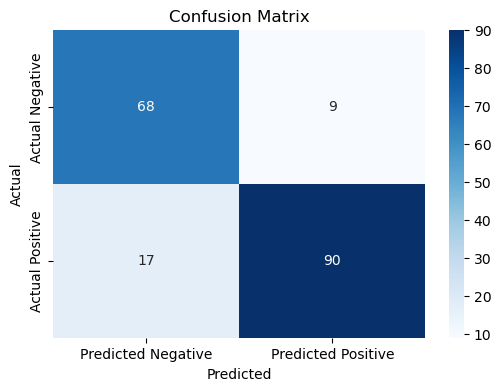

In [67]:
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
svm_classifier = SVC(kernel='linear', C=1.0)


svm_classifier.fit(X_train_copy[imp_cols], y_train)


y_pred = svm_classifier.predict(X_test_copy[imp_cols])


accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8369565217391305

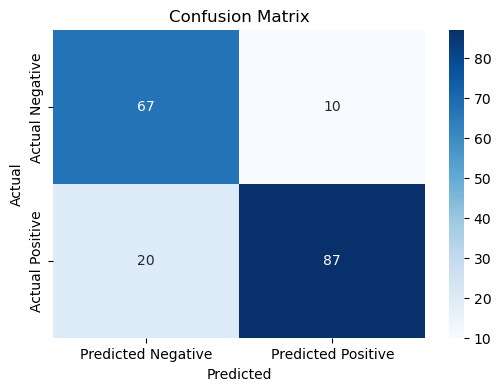

In [71]:
cm2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_copy[imp_cols], y_train)

y_pred_class = dt_classifier.predict(X_test_copy[imp_cols])

accuracy = accuracy_score(y_test, y_pred_class)
accuracy

0.782608695652174

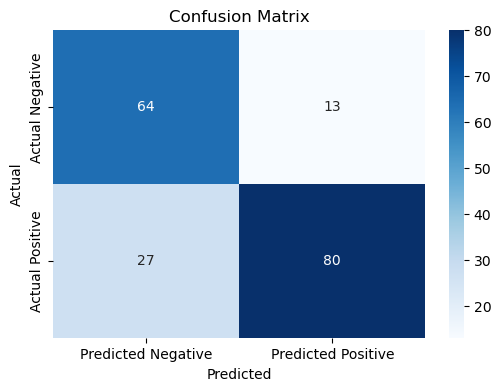

In [75]:
cm3 = confusion_matrix(y_test, y_pred_class)


plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
pip install xgboost

In [84]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_copy[imp_cols], label=y_train)
dtest = xgb.DMatrix(X_test_copy[imp_cols], label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.3,
    'eval_metric': 'merror'
}

num_rounds = 10
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred_xgb = xgb_model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.8858695652173914

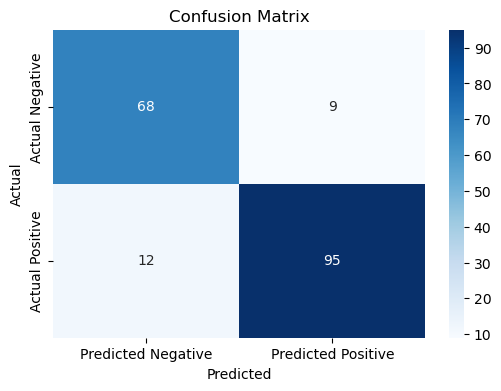

In [85]:
cm4 = confusion_matrix(y_test, y_pred_xgb)


plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [88]:
import joblib

joblib.dump(xgb_model, 'Heart_Failure_Prediction_model.joblib')

['Heart_Failure_Prediction_model.joblib']

In [92]:
joblib.dump(lr, 'Heart_Failure_Prediction_lr_model.joblib')

['Heart_Failure_Prediction_lr_model.joblib']

In [94]:
loaded_model = joblib.load('Heart_Failure_Prediction_model.joblib')
y_pred_xgb = loaded_model.predict(dtest)


accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.8858695652173914

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1, random_state = 1)

In [182]:
clf=LogisticRegression(max_iter=320, solver='newton-cg')

In [184]:
clf.fit(X_train,Y_train)

LogisticRegression(max_iter=320, solver='newton-cg')

In [190]:
y_pred=clf.predict(X_test)

In [194]:
from sklearn.metrics import classification_report

In [196]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.96      0.95      0.95        55

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



In [198]:
clf.score(x,y)

0.8529411764705882

In [200]:
LOAC=metrics.accuracy_score(Y_test,y_pred)

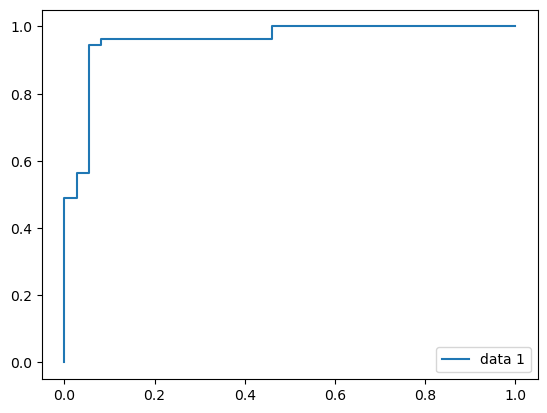

In [208]:
y_pred_proba = clf.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc=4)
plt.show()

In [210]:
from sklearn.neighbors import KNeighborsClassifier


In [212]:
k=20
acc=np.zeros((k))
for i in range (1,k+1):
    nclf=KNeighborsClassifier(n_neighbors=i)
    nclf.fit(X_train,Y_train)
    ny_pred=nclf.predict(X_test)
    acc[i-1]=metrics.accuracy_score(Y_test,ny_pred)
acc

array([0.76086957, 0.7173913 , 0.75      , 0.68478261, 0.70652174,
       0.69565217, 0.7173913 , 0.68478261, 0.76086957, 0.7173913 ,
       0.70652174, 0.68478261, 0.69565217, 0.68478261, 0.75      ,
       0.68478261, 0.72826087, 0.68478261, 0.72826087, 0.68478261])

In [214]:
acc.max()

0.7608695652173914

In [216]:
nclf=KNeighborsClassifier(n_neighbors=9)
nclf.fit(X_train,Y_train)
ny_pred=nclf.predict(X_test)
KNAC=metrics.accuracy_score(Y_test,ny_pred)

In [218]:
print(classification_report(Y_test,ny_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        37
           1       0.80      0.80      0.80        55

    accuracy                           0.76        92
   macro avg       0.75      0.75      0.75        92
weighted avg       0.76      0.76      0.76        92



In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [222]:
dtclf=DecisionTreeClassifier(max_depth=3)
dtclf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [224]:
dty_pred=dtclf.predict(X_test)

In [226]:
DTAC=metrics.accuracy_score(Y_test,dty_pred)

In [228]:
from sklearn import tree

In [230]:
text_representation=tree.export_text(dtclf)
print(text_representation)

|--- feature_10 <= 1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_7 <= 151.00
|   |   |   |--- class: 1
|   |   |--- feature_7 >  151.00
|   |   |   |--- class: 0
|--- feature_10 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_9 <= 0.45
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.45
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_9 <= 2.20
|   |   |   |--- class: 0
|   |   |--- feature_9 >  2.20
|   |   |   |--- class: 1



In [234]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

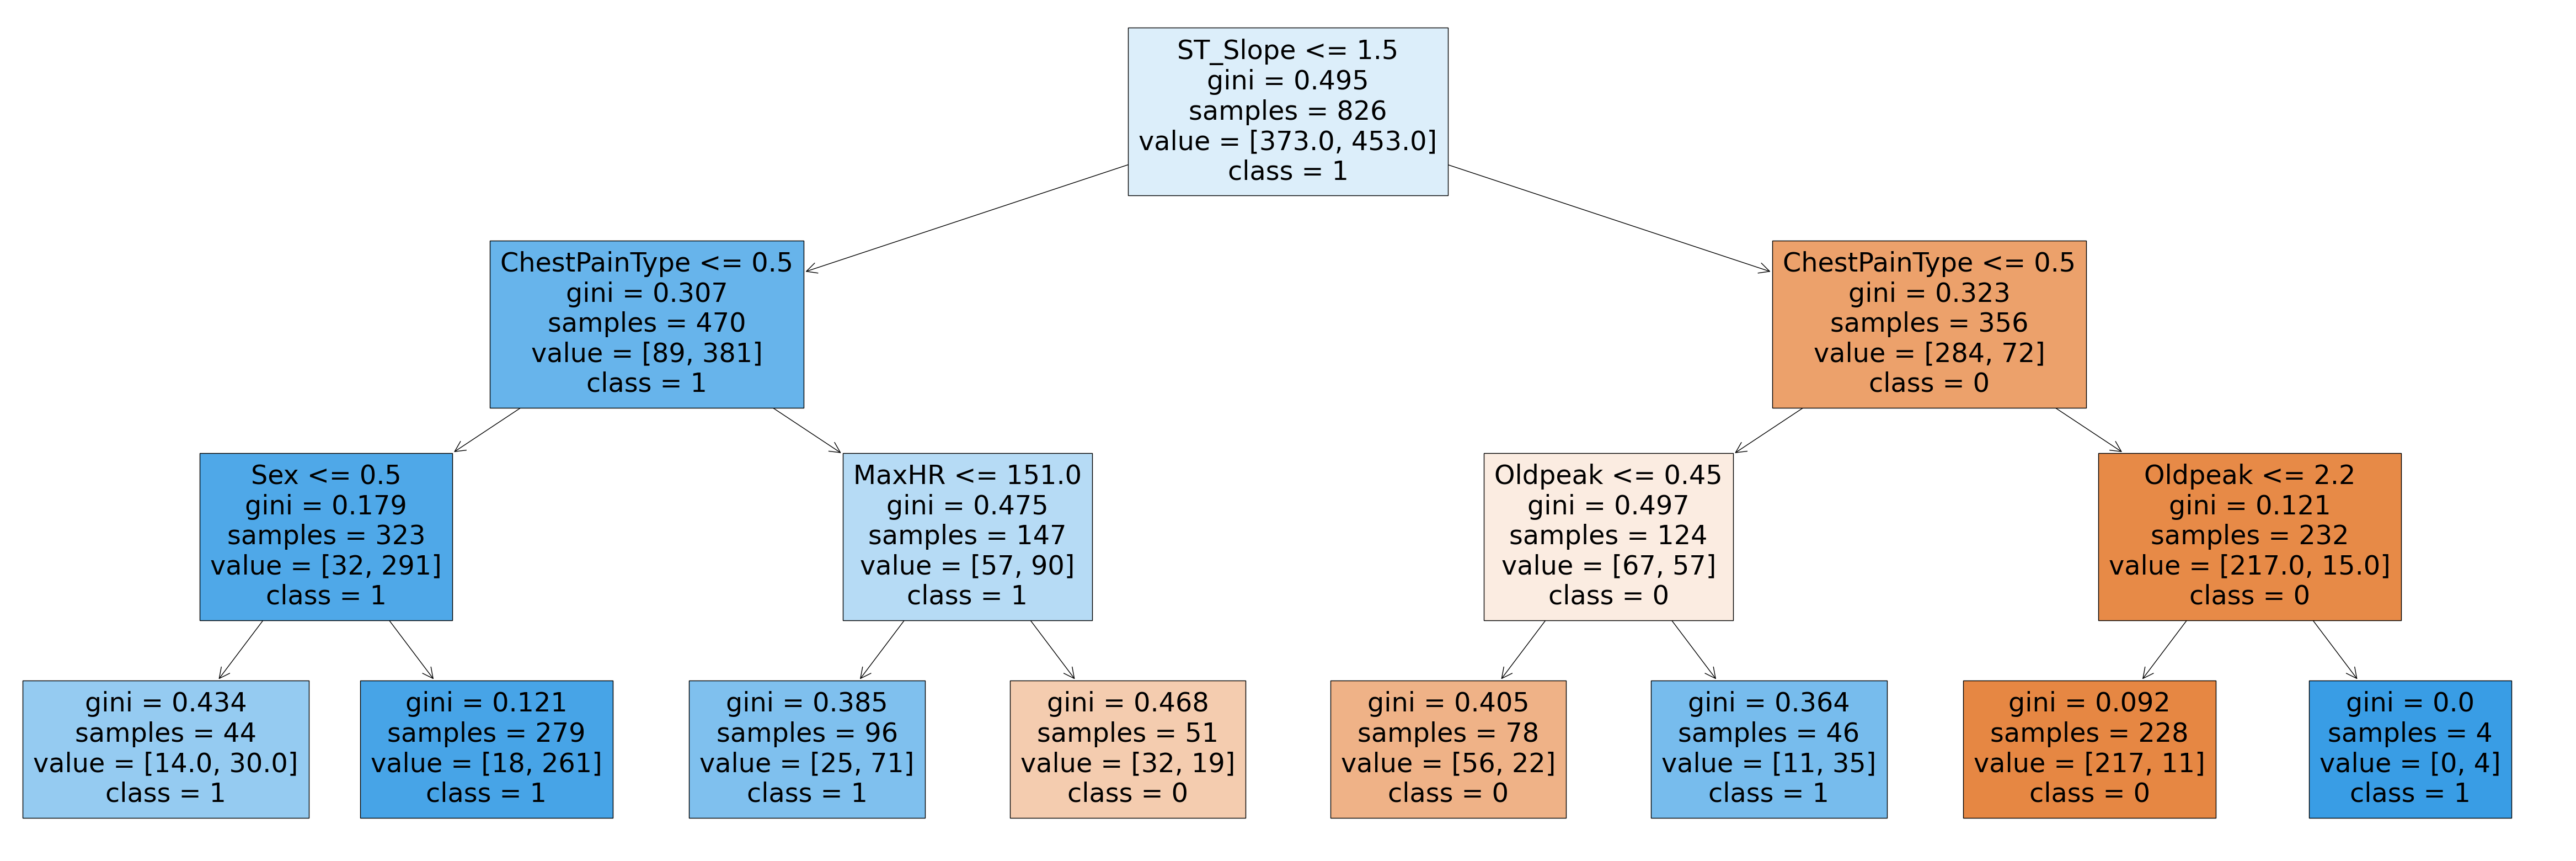

In [236]:
f_n=["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak",'ST_Slope']
t_n=["0","1"]
fig=plt.figure(figsize=(60,20),dpi=100)
plot=tree.plot_tree(dtclf,feature_names=f_n,class_names=t_n,filled=True)
plt.show()

In [238]:
rfclf=RandomForestClassifier(n_estimators=160,max_depth=5,random_state=110)
rfclf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=160, random_state=110)

In [240]:
rfy_pred=rfclf.predict(X_test)

In [242]:
RFAC=metrics.accuracy_score(Y_test,rfy_pred)

In [244]:
print(classification_report(Y_test,rfy_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.96      0.96      0.96        55

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92



In [246]:
from sklearn.naive_bayes import GaussianNB

In [248]:
Gclf=GaussianNB()
Gclf.fit(X_train,Y_train)

GaussianNB()

In [250]:
Gy_pred=Gclf.predict(X_test)
GAC=metrics.accuracy_score(Y_test,Gy_pred)
GAC

0.9239130434782609

In [252]:
from sklearn.svm import SVC

In [254]:
svcclf=SVC(kernel='linear')
svcclf.fit(X_train,Y_train)

SVC(kernel='linear')

In [256]:
svcy_pred=svcclf.predict(X_test)
svcAC=metrics.accuracy_score(Y_test,svcy_pred)
svcAC

0.9565217391304348

In [258]:
compar=pd.DataFrame(columns=["algorithm","Accuracy"])
compar.loc[len(compar)] = ['LogisticRegression', LOAC]
compar.loc[len(compar)] = ['KNeighborsClassifier', KNAC]
compar.loc[len(compar)] = ['DecisionTreeClassifier', DTAC]
compar.loc[len(compar)] = ['RandomForestClassifier', RFAC]
compar.loc[len(compar)] = ['GaussianNB', GAC]
compar.loc[len(compar)] = ['svc', svcAC]

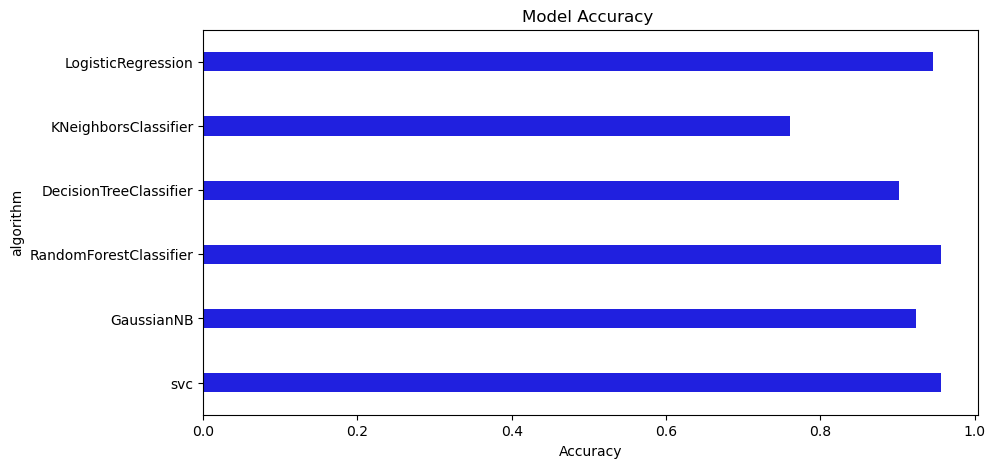

In [260]:
plt.figure(figsize=[10,5])
plt.title('Model Accuracy ')
sns.barplot(x='Accuracy', y='algorithm', data=compar ,width=0.3,color='blue')
plt.show()

In [262]:
compar

,algorithm,Accuracy
0,LogisticRegression,0.945652
1,KNeighborsClassifier,0.760870
2,DecisionTreeClassifier,0.902174
3,RandomForestClassifier,0.956522
4,GaussianNB,0.923913
5,svc,0.956522
